In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot 
pyplot.rcParams['figure.figsize'] = [20, 10] # set the figure s
import seaborn as sns

In [3]:
df=pd.read_csv('ebola_2014_2016_clean.csv')

In [5]:
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
df.head(3)

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 10 columns):
Country                                            2485 non-null object
Date                                               2485 non-null object
No. of suspected cases                             2366 non-null float64
No. of probable cases                              2436 non-null float64
No. of confirmed cases                             2484 non-null float64
No. of confirmed, probable and suspected cases     2477 non-null float64
No. of suspected deaths                            1308 non-null float64
No. of probable deaths                             1526 non-null float64
No. of confirmed deaths                            1648 non-null float64
No. of confirmed, probable and suspected deaths    2485 non-null float64
dtypes: float64(8), object(2)
memory usage: 194.3+ KB


In [7]:
df.describe()

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2366.000000,2436.000000,2484.000000,2477.000000,1308.000000,1526.000000,1648.000000,2485.000000
mean,891.841505,263.733580,1436.616345,2553.678644,32.899083,104.535387,781.662015,1028.347686
std,1828.699240,561.483886,2574.200797,4427.118148,73.166362,161.420208,1258.113098,1656.064372
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,7.000000,8.000000,0.000000,1.000000,2.000000,6.000000
75%,17.000000,287.000000,3118.000000,3657.000000,0.000000,208.000000,1760.750000,2386.000000
max,5636.000000,2106.000000,8704.000000,14122.000000,661.000000,803.000000,3858.000000,4806.000000


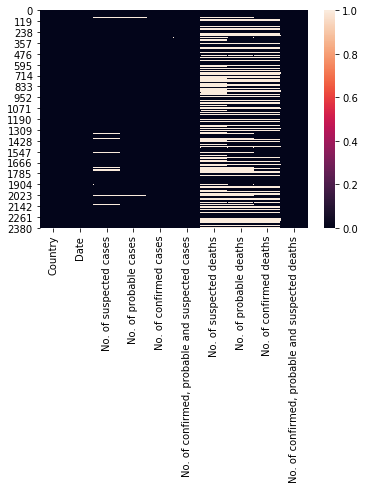

In [8]:
#To check nan values are available or  not:
sns.heatmap(df.isnull())

In [25]:
# Renaming column values and column names to reduce space.
df['Country'] = df['Country'].str.replace('United States of America', 'USA')
df['Country'] = df['Country'].str.replace('United Kingdom', 'UK')
df = df.rename(columns={'No. of suspected cases':'Suspected_Cases',
                            'No. of probable cases':'Probable_Cases',
                            'No. of confirmed cases':'Confirmed_Cases',
                            'No. of confirmed, probable and suspected cases': 'All_cases',
                            'No. of suspected deaths': 'Suspected_Deaths',
                            'No. of probable deaths': 'Probable_Deaths',
                            'No. of confirmed deaths': 'Confirmed_Deaths',
                            'No. of confirmed, probable and suspected deaths': 'All_Deaths',
                            })

In [56]:
# Compute the correlation matrix 
correlations = df.corr(method = 'pearson') # Correlations between all pairs of attributes
# Print the datatype 
type(correlations)
# Show the correlation matrix 
correlations

,Suspected_Cases,Probable_Cases,Confirmed_Cases,All_cases,Suspected_Deaths,Probable_Deaths,Confirmed_Deaths,All_Deaths
Suspected_Cases,1.000000,0.793795,0.726243,0.928285,0.438303,0.097172,0.419259,0.903934
Probable_Cases,0.793795,1.000000,0.385837,0.672465,0.112709,0.141111,0.083339,0.811091
Confirmed_Cases,0.726243,0.385837,1.000000,0.925127,0.712473,0.573382,0.906722,0.835919
All_cases,0.928285,0.672465,0.925127,1.000000,0.606627,0.390751,0.708187,0.955847
Suspected_Deaths,0.438303,0.112709,0.712473,0.606627,1.000000,0.458775,0.704344,0.453831
Probable_Deaths,0.097172,0.141111,0.573382,0.390751,0.458775,1.000000,0.751922,0.470324
Confirmed_Deaths,0.419259,0.083339,0.906722,0.708187,0.704344,0.751922,1.000000,0.619947
All_Deaths,0.903934,0.811091,0.835919,0.955847,0.453831,0.470324,0.619947,1.000000


Text(0.5, 1, 'Correlation between different fearures')

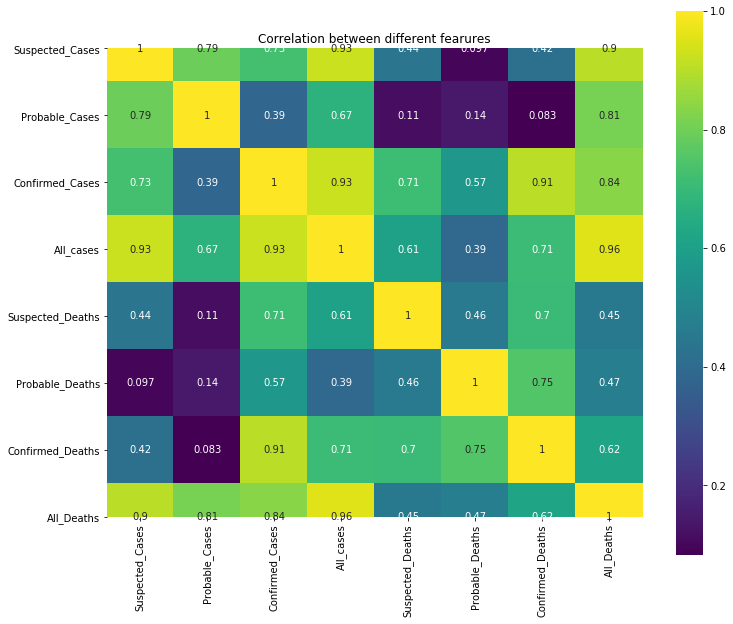

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [19]:
#Replacing Null with Zero
df=df.fillna(0)

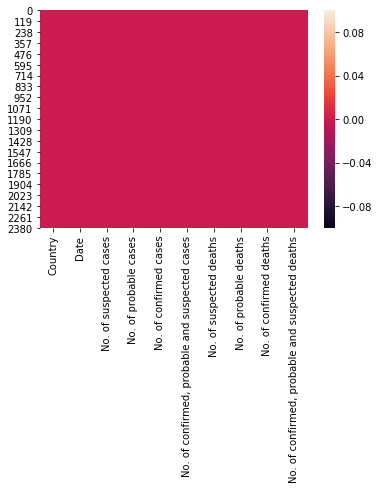

In [20]:
#To check nan values are available or  not:
sns.heatmap(df.isnull())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 10 columns):
Country                                            2485 non-null object
Date                                               2485 non-null object
No. of suspected cases                             2485 non-null float64
No. of probable cases                              2485 non-null float64
No. of confirmed cases                             2485 non-null float64
No. of confirmed, probable and suspected cases     2485 non-null float64
No. of suspected deaths                            2485 non-null float64
No. of probable deaths                             2485 non-null float64
No. of confirmed deaths                            2485 non-null float64
No. of confirmed, probable and suspected deaths    2485 non-null float64
dtypes: float64(8), object(2)
memory usage: 194.3+ KB


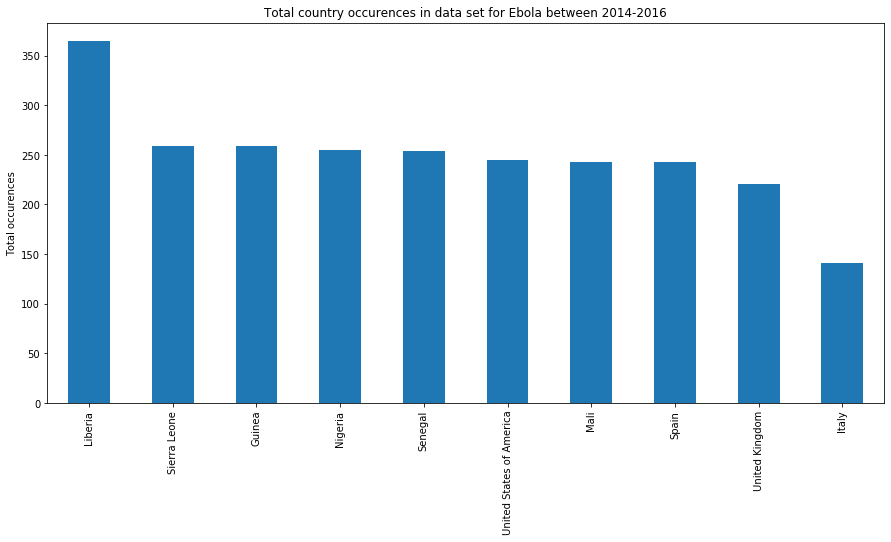

In [23]:
country_count = df['Country'].value_counts()
plt.figure(figsize=(15, 7))
plt.ylabel('Total occurences')
plt.title('Total country occurences in data set for Ebola between 2014-2016')
country_count.plot(kind='bar')
plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


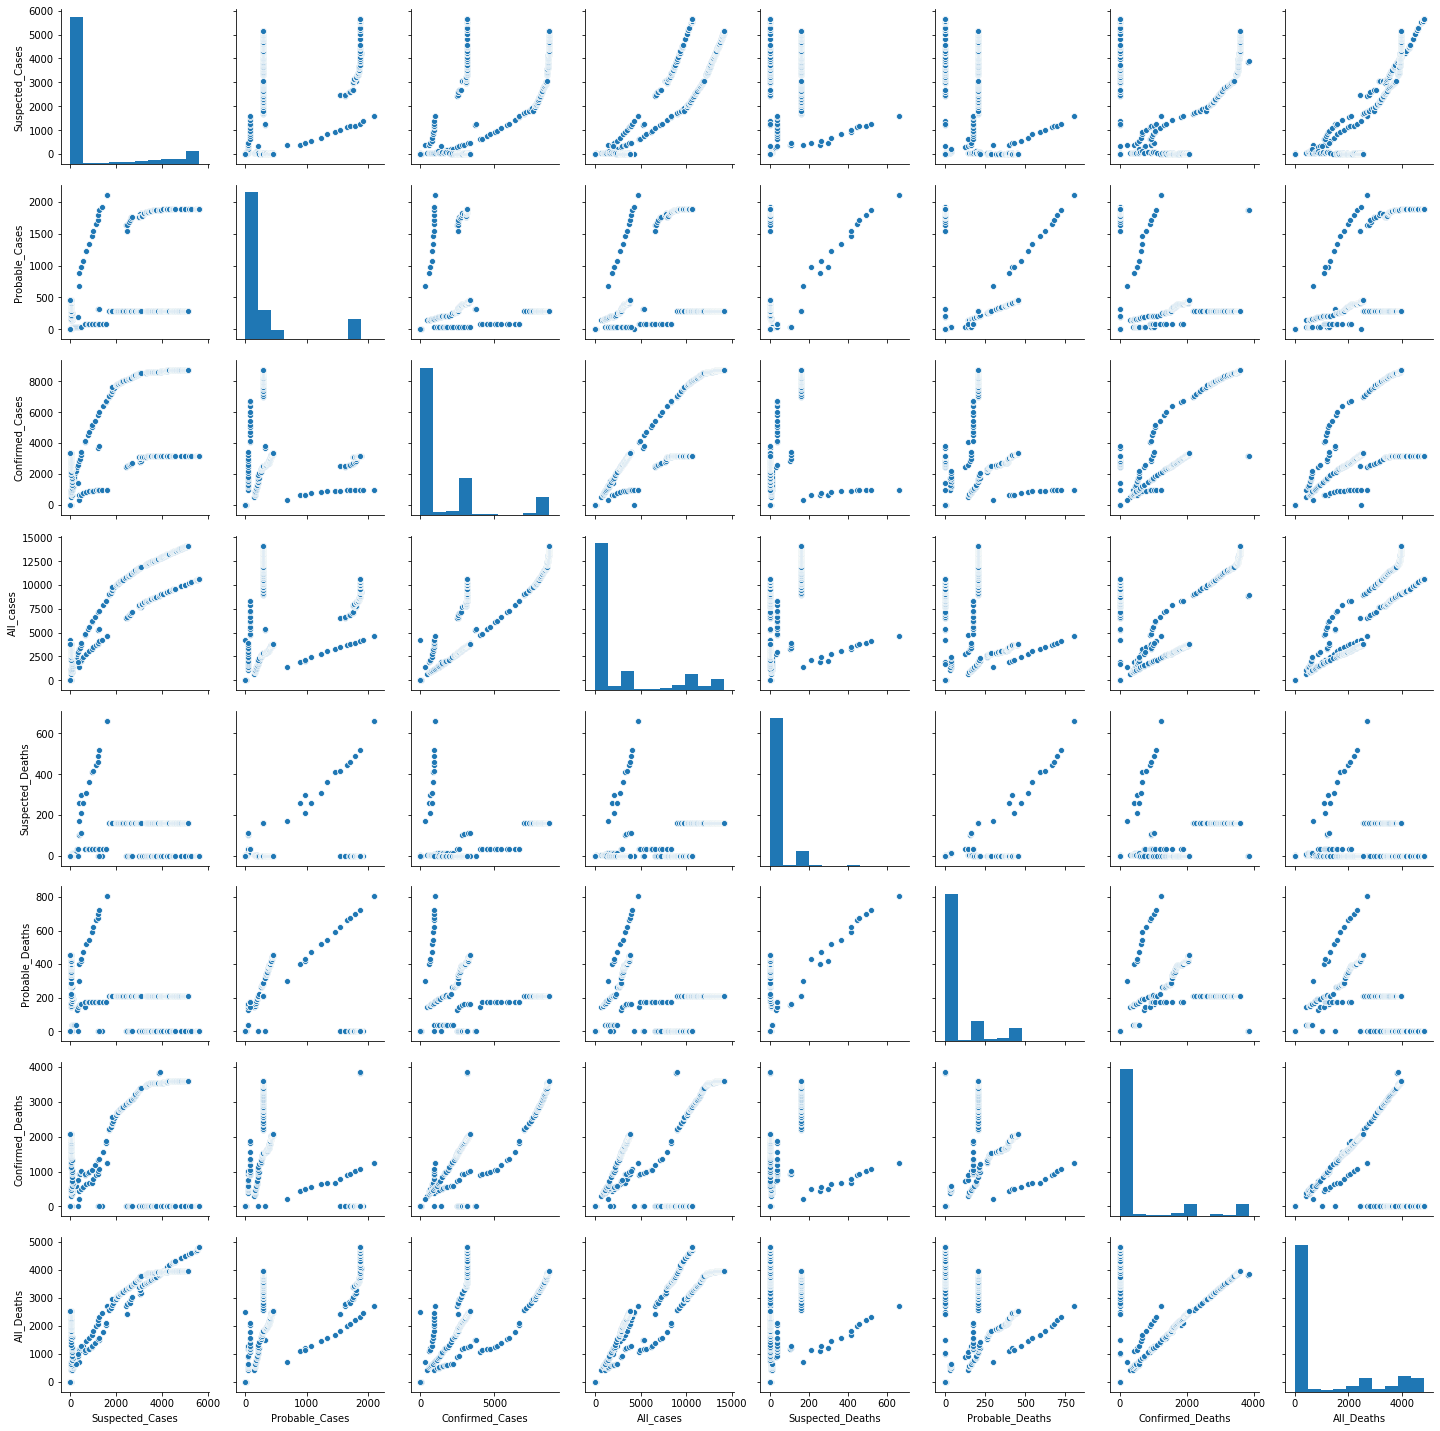

In [57]:
sns.pairplot(df, size = 2.5)
plt.show();

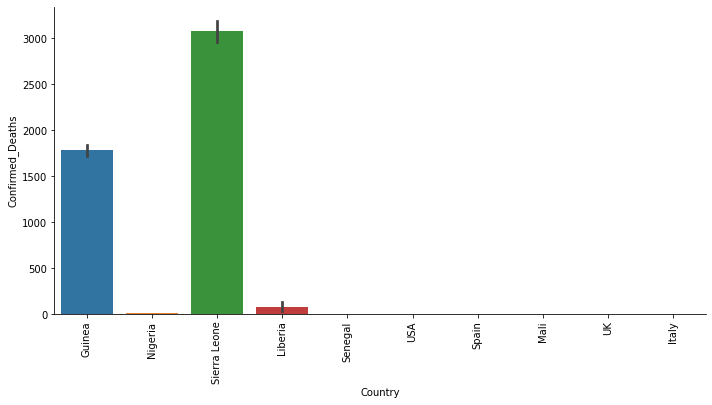

In [45]:
g=sns.factorplot(x='Country', y='Confirmed_Deaths', data=df, kind='bar', size=5,aspect=2)
g.set_xticklabels(rotation=90)

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


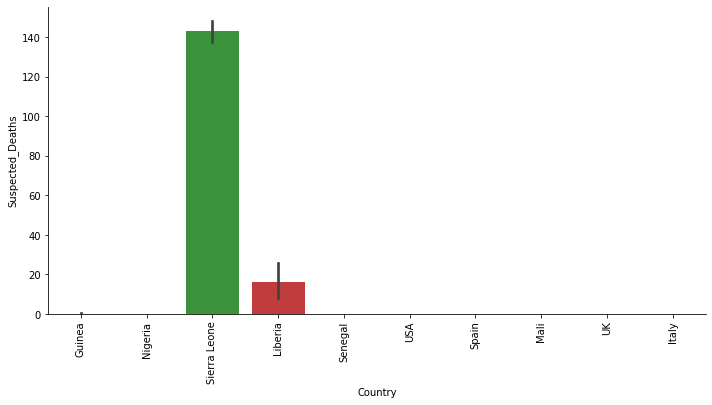

In [61]:
g=sns.factorplot(x='Country', y='Suspected_Deaths', data=df, kind='bar', size=5,aspect=2)
g.set_xticklabels(rotation=90)

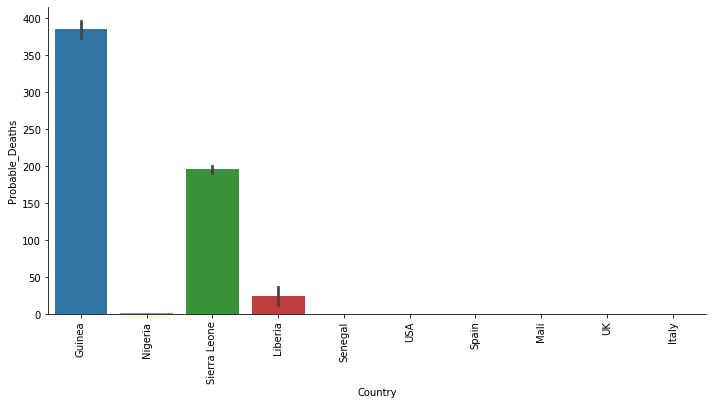

In [62]:
g=sns.factorplot(x='Country', y='Probable_Deaths', data=df, kind='bar', size=5,aspect=2)
g.set_xticklabels(rotation=90)

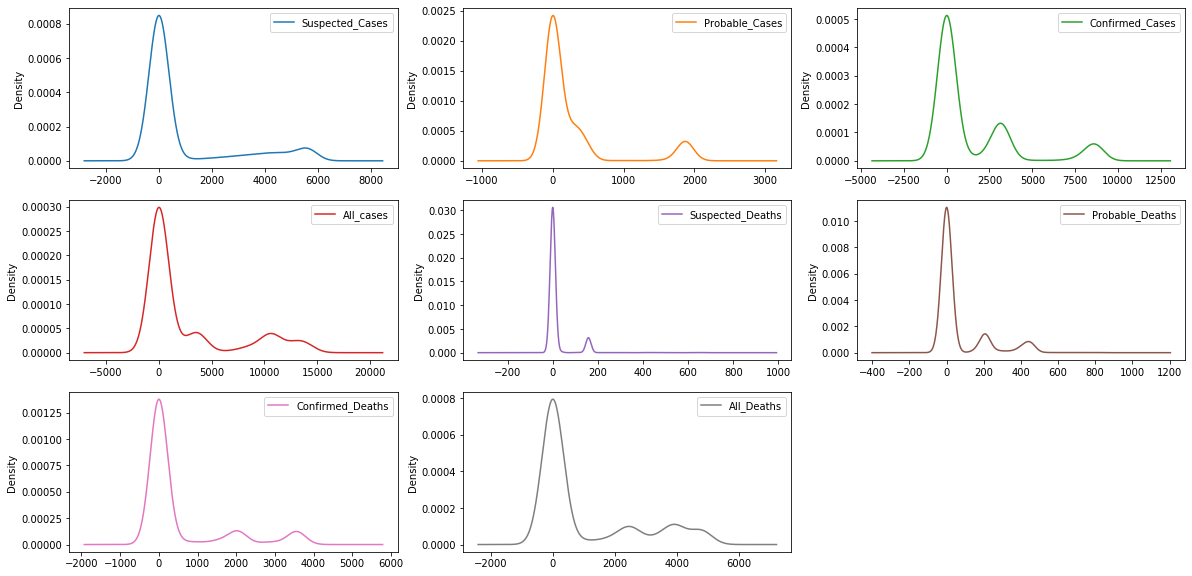

In [55]:
# Density plots for all attributes
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

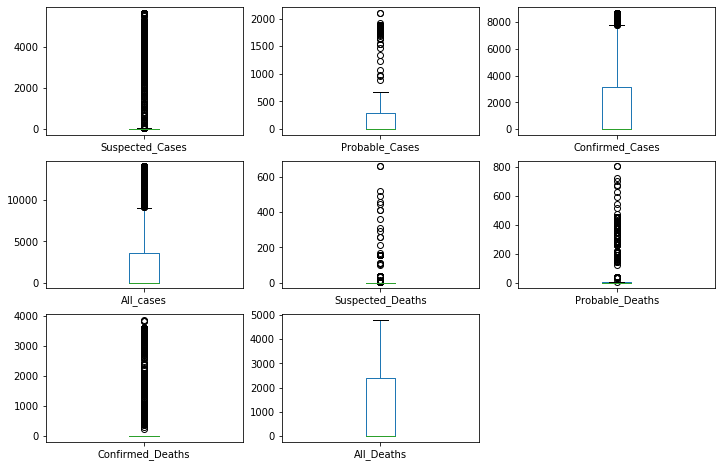

In [58]:
#Boxplot of each column
df.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3))
plt.show()

In [66]:
# Prediction target, defining features and X variable
Y= df['All_Deaths']
features = ['Suspected_Deaths', 'Probable_Deaths', 'Confirmed_Deaths']
X = df[features]

In [70]:
from sklearn.ensemble import RandomForestRegressor



In [79]:





 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X, Y)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [80]:
# Tope 5 predicitons for X
print(f"The death predictions are: {regressor.predict(X.head())}")

The death predictions are: [470.84   6.77 453.23 739.62 506.14]
